# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

To find the effectiveness of marketting campaigns, Portugese bank reached out to customers from their contact centers and collected the customer perspective. This collected data along with the internal customer data within bank was used to prepare the dataset features for analysis. The classification goal was to determine if a client will subscribe to a term deposite. The team used 3 iterartions of campaign to fine tune the predective model.    

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
## Imports for the project
import pandas as pd
import seaborn
import plotly.express as px
from pathlib import Path
from sklearn.impute import SimpleImputer
import sklearn  
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import TargetEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [2]:
## Read the downloaded dataframe  
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
## Check the dataset sample
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
## Checking for Null/ NAN values in dataframe
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
## Evaluate the traget valiable of the classifier.
fig = px.pie(df[['y']].value_counts().reset_index(), values='count', names='y' ,height=330, width=400,title='Customer Subscribe to Term-deposite')
fig.show() 

## Note: The data shows high imbalance in Target class with ~11% customer agreeing to subscribe deposite term  

In [6]:
## The code print the feature values unique count for analysis. The report generated by this step will be used to analyse the feature grouping and volume of unknows present in the feature ##

## The output of this step will be written to relative path 

with open('data/output.txt', 'w') as f:
   for i in ['job', 'marital', 'education', 'default', 'housing', 'loan',
          'contact', 'month', 'day_of_week', 'campaign', 'pdays',
          'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
         'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']:
         p = []
         p = df[[i]].value_counts().reset_index()
         f.write(i)
         f.write('\n\n')
         f.write(p.to_string(index=False))
         f.write('\n\n')  # Add blank lines between DataFrames
   f.close()

In [7]:
## After performing feature analysis decided to impute "unknowns" for columns with simple imputer strategy. 

# Execute most frequent strategy
simple_imp = SimpleImputer(strategy='most_frequent', missing_values= 'unknown')

# Convert output to dataframe
df_imp = pd.DataFrame(simple_imp.fit_transform(df), columns=df.columns)
# Print output 
df_imp


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [8]:
## Rerun the feature analysis report post executing imputation
f.close()
with open('data/output1.txt', 'w') as f:
   for i in ['job', 'marital', 'education', 'default', 'housing', 'loan',
          'contact', 'month', 'day_of_week', 'campaign', 'pdays',
          'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
         'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']:
         p = []
         p = df_imp[[i]].value_counts().reset_index()
         f.write(i)
         f.write('\n\n')
         f.write(p.to_string(index=False))
         f.write('\n\n')  # Add blank lines between DataFrames
   f.close()
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

Business Objectives:


1. The business goal is to generate a model to predict if client will subscribe to a term deposite. 
2. Evalute multiple models and select model with high accuracy of prediction.
3. Find a model that can explain success of a contact, i.e. if the client subscribes the deposit. Such model can increase campaign efficiency by    
   identifying the main characteristics that affect success, helping in a better management of the available resources (e.g. human effort, phone calls, time) and selection of a high quality and affordable set of potential buying customers.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [9]:
## Prep the Dataframe for Model 

# drop target column
df_scaled = df_imp.drop('y', axis=1)
y = df_imp['y']
y = np.where(y=='no',0,1)
col = []

# Prepare column transformer to apply the data encoding for categorical variables using onehotencoder and target encoder 
pre_process = ColumnTransformer([
                                ("encoder_marital", OneHotEncoder(), ['marital', 'default', 'housing', 'loan','contact','poutcome']),
                                ("target_encoder", TargetEncoder(), ["job", "education", "month", "day_of_week"])] 
                                , remainder="passthrough")

## Pipeline JOB to execute the data encoder and scale the data.
data = Pipeline([
                   ('preprocess', pre_process), 
                   ('scaler', StandardScaler()),
        ])

# Run the pipeline with original dataset
scaled_df = data.fit_transform(df_scaled,y)

# Recreate the final scaled dataframe 
for i in pre_process.get_feature_names_out():
    col.append(i.split("__")[1:][0])
scaled_df = pd.DataFrame(scaled_df, columns=col)

# Print the dataframe
scaled_df


,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,...,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.355097,0.804359,-0.624938,0.008535,-0.008535,1.100814,-1.100814,0.422872,-0.422872,-1.31827,...,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
1,-0.355097,0.804359,-0.624938,0.008535,-0.008535,1.100814,-1.100814,0.422872,-0.422872,-1.31827,...,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
2,-0.355097,0.804359,-0.624938,0.008535,-0.008535,-0.908418,0.908418,0.422872,-0.422872,-1.31827,...,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
3,-0.355097,0.804359,-0.624938,0.008535,-0.008535,1.100814,-1.100814,0.422872,-0.422872,-1.31827,...,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
4,-0.355097,0.804359,-0.624938,0.008535,-0.008535,1.100814,-1.100814,-2.364781,2.364781,-1.31827,...,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,-0.355097,0.804359,-0.624938,0.008535,-0.008535,-0.908418,0.908418,0.422872,-0.422872,0.75857,...,3.164336,0.292025,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41184,-0.355097,0.804359,-0.624938,0.008535,-0.008535,1.100814,-1.100814,0.422872,-0.422872,0.75857,...,0.573445,0.481012,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41185,-0.355097,0.804359,-0.624938,0.008535,-0.008535,-0.908418,0.908418,0.422872,-0.422872,0.75857,...,1.533034,-0.267225,-0.204909,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697
41186,-0.355097,0.804359,-0.624938,0.008535,-0.008535,1.100814,-1.100814,0.422872,-0.422872,0.75857,...,0.381527,0.708569,-0.565922,0.195414,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697


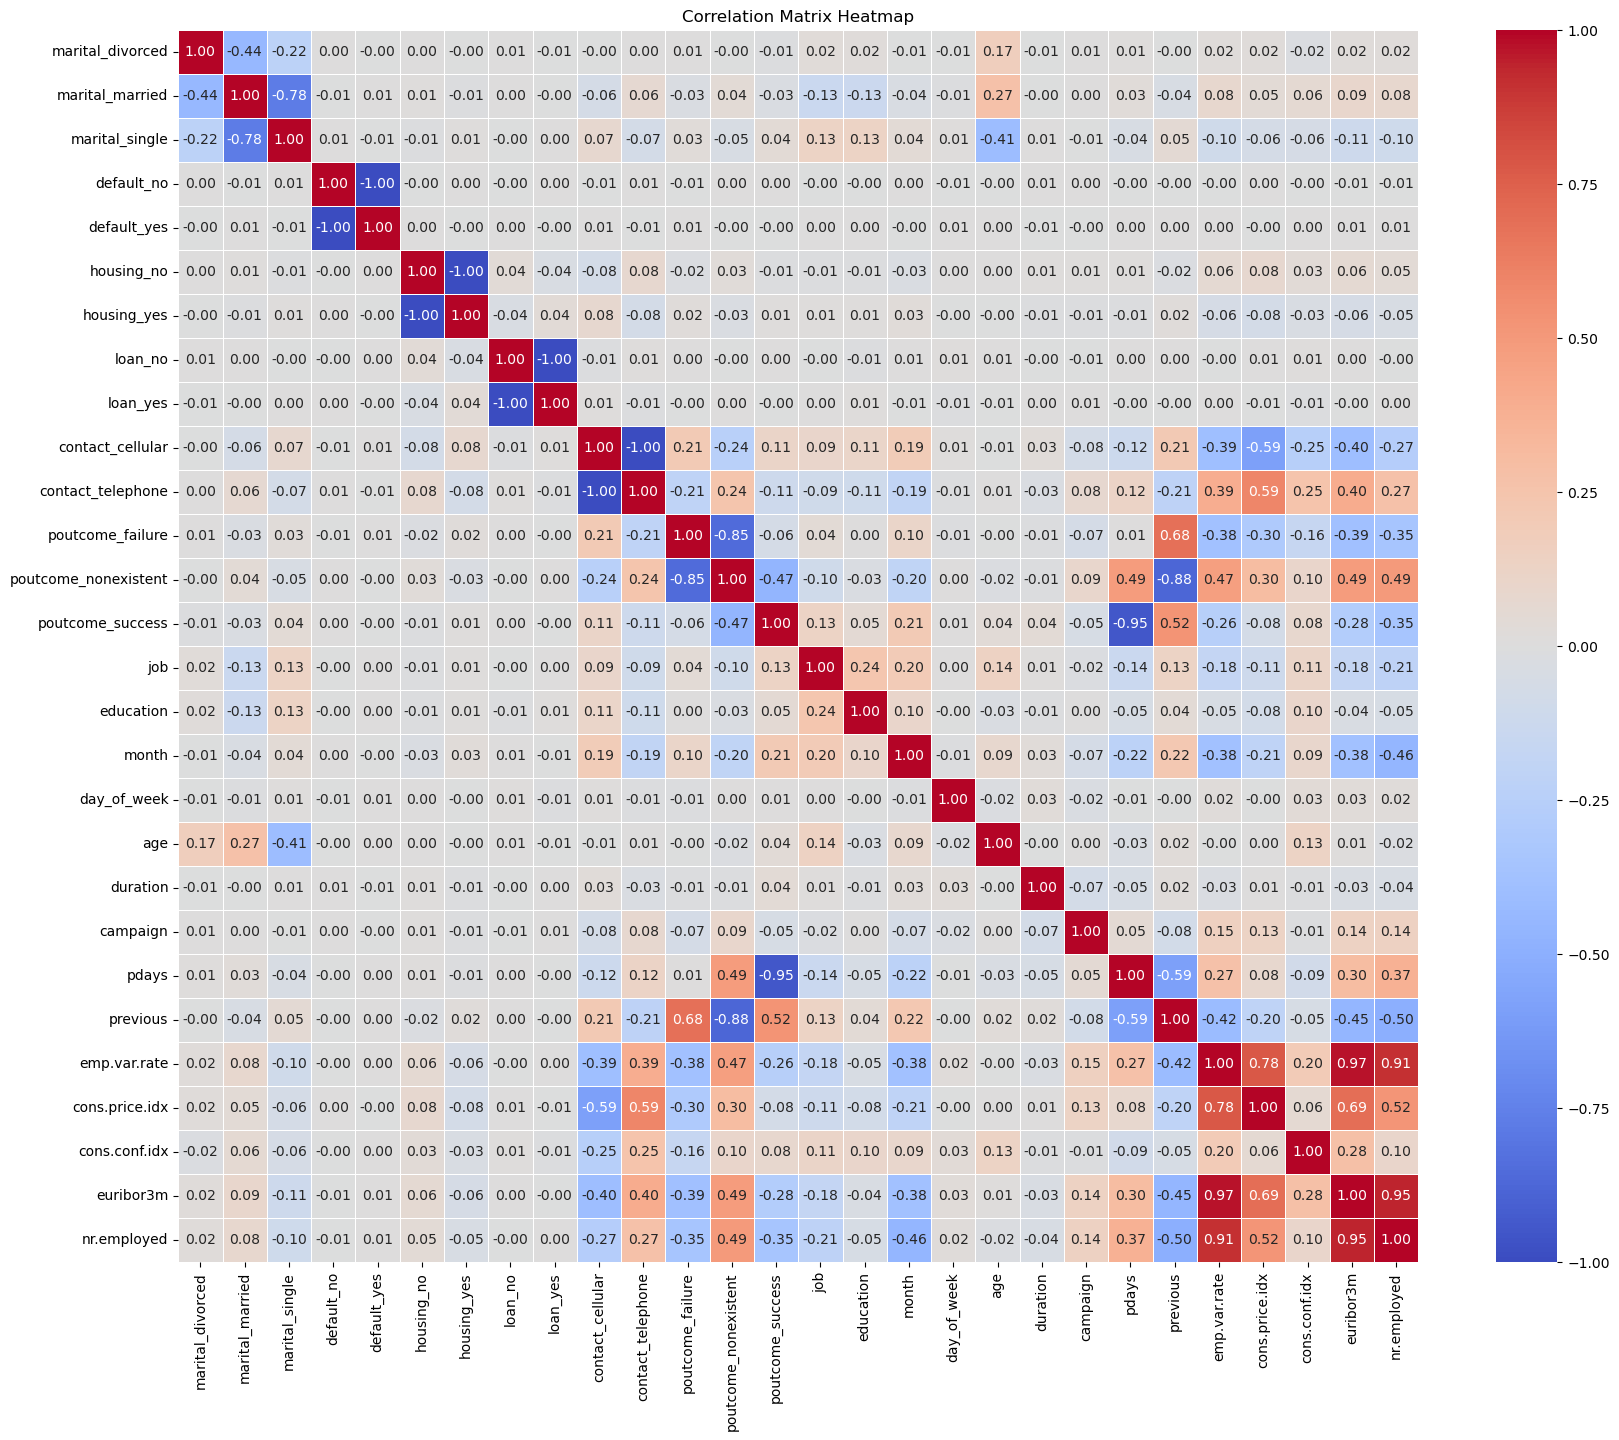

In [10]:
## Generate the correlation matrix heatmap to identify the tight coupling between features. 
# The correlation is function is executed on scaled dataframe, which eliminates most of pre-dependencies

from matplotlib import pyplot as plt
import seaborn
correlation_matrix = scaled_df.corr()
plt.figure(figsize=(20, 16))  # Adjust the figure size if needed
seaborn.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Note: The correlation matrix on scaled data shows majorly de-coupled, and looks good for processing. 

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

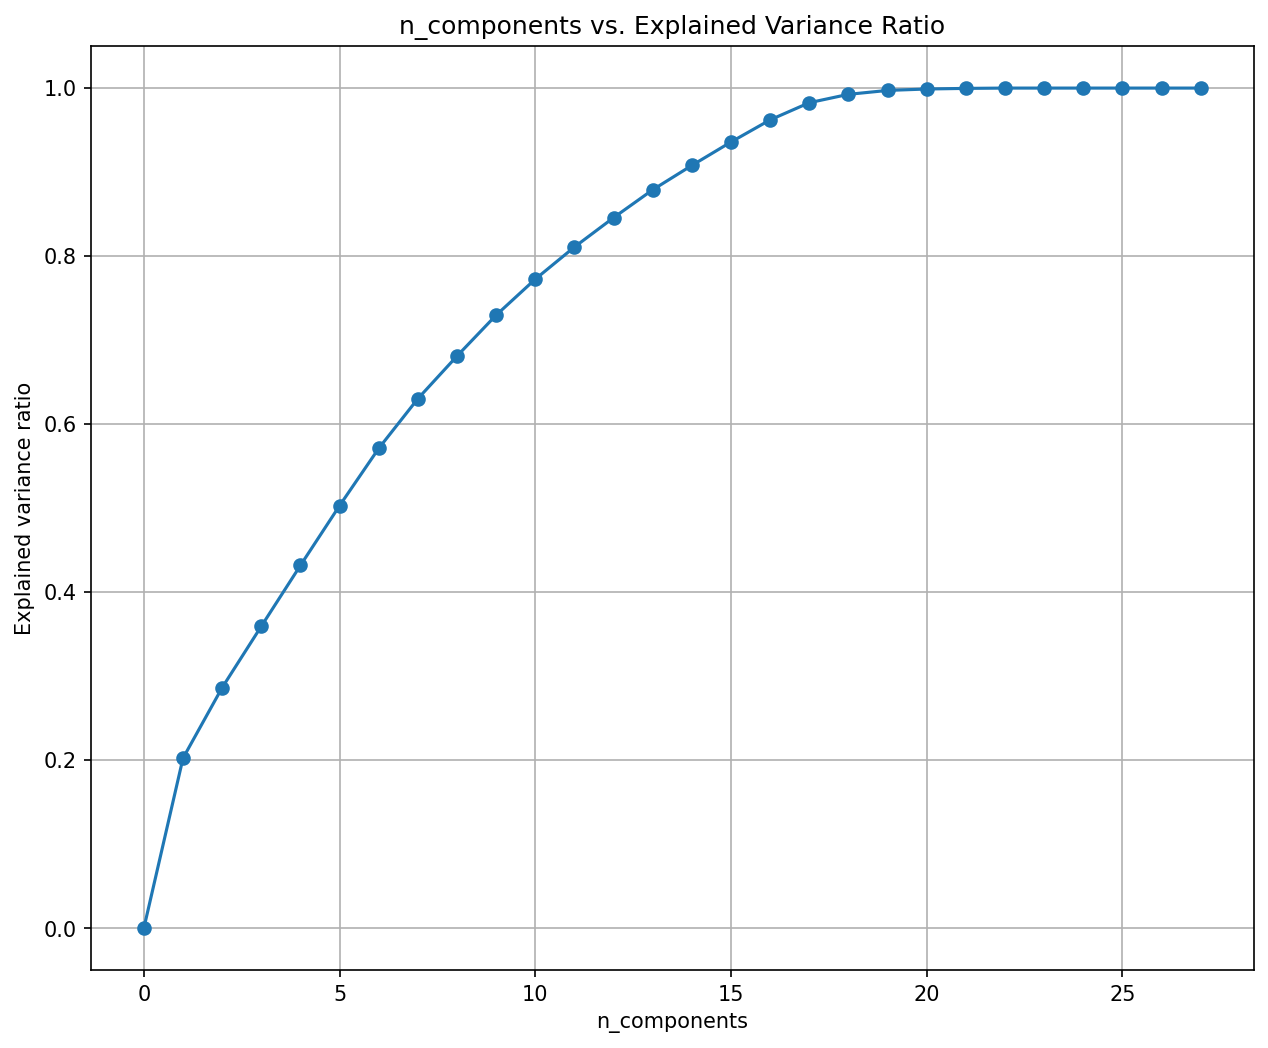

In [11]:
## Execute the PCA on the dataframe to identify any scope of feature elimination 
# Import skitlearn PCA component
from sklearn.decomposition import PCA

# Set the iteration count equal to number of features 
iterates = np.arange(28)
# Initialise the variance ratio 
var_ratio = []

# Execute for loop and store the variance ratio for each run
for iterate in iterates:
  pca = PCA(n_components=iterate)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

#Plot the PCA 
plt.figure(figsize=(10,8),dpi=150)
plt.grid()
plt.plot(iterates,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [12]:
## Extract the important features and rank using Random forest classifier

# Import Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the Random forest
rf = RandomForestClassifier(n_estimators=100,criterion='gini')

# Perform fit to the classifier
rf.fit(scaled_df,y)
fx = pd.DataFrame(rf.feature_importances_,columns=['Importance']).set_index(scaled_df.columns).sort_values(by='Importance', ascending=False)

# Plot the features importance
fig = px.bar(fx, x=fx.index, y='Importance', title='Feature Importance')
fig.show()
fx




,Importance
duration,2.922212e-01
euribor3m,9.918889e-02
age,7.473724e-02
nr.employed,6.166176e-02
job,6.139138e-02
day_of_week,5.828411e-02
education,5.505459e-02
month,5.036478e-02
campaign,3.551184e-02
pdays,2.579994e-02


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
## Split the dataset in test and train
from typing import Counter
from sklearn.model_selection import train_test_split

# Use test train split to split the dataset
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, train_size= 0.7, random_state = 42)
Counter(y_test)


Counter({0: 10968, 1: 1389})

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [14]:
## Generate score from baseline model to gauge the performance of models at latter stage. 
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

# Call dummy classifier 
dummy_clf = DummyClassifier(strategy="most_frequent")

# Fit the classifier
dummy_clf.fit(X_train, y_train)

# Make predictions
y_pred = dummy_clf.predict(X_train)

# Evaluate the classifier
print("Baseline Score:", np.round(dummy_clf.score(X_test, y_test),5))

## Generate classification report to baseline other parameters


Baseline Score: 0.88759


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [15]:
## Imports for Regression

from sklearn.linear_model import LogisticRegression
import time

# Initialize the model
model_lr = LogisticRegression() 

# Fit the model & capture time to train 
start_time_p = time.perf_counter()
model_lr.fit(X_train, y_train)
end_time_p = time.perf_counter()

# Predict on test data
pTest_lr = model_lr.predict(X_test)

#Predict model on training data
pTrain_lr = model_lr.predict(X_train)

# Elapsed time for model training
lr_train_time = (end_time_p - start_time_p)


### Problem 9: Score the Model

What is the accuracy of your model?

In [16]:
## Import Logistics Regression model accuracy score 
from sklearn.metrics import accuracy_score

# Initialize list to capture the model comparison stats 
ct = []

# Calculate the test & train accuracy score 
lr_acc_train = np.round(accuracy_score(y_train, pTrain_lr), 5)  # type: ignore
lr_acc_test = np.round(accuracy_score(y_test, pTest_lr), 5) 

# Print the data and generate the classification report 
print('Logistics Regression accuracy training score: ', lr_acc_train)
print('Logistics Regression accuracy testing score: ' , lr_acc_test)
print('\n')
print('Logistics Regression Train time: ', lr_train_time)
print('\n\n')
print('**** Classification Matrix: **** ')
print(classification_report(y_test, pTest_lr)) # type: ignore

# Append the data to model comparison stats
ct.append(["Logistics Regression", lr_train_time, lr_acc_train, lr_acc_test])


Logistics Regression accuracy training score:  0.90972
Logistics Regression accuracy testing score:  0.9105


Logistics Regression Train time:  0.390194599996903



**** Classification Matrix: **** 
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10968
           1       0.67      0.40      0.50      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.69      0.73     12357
weighted avg       0.90      0.91      0.90     12357



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [17]:
## Import Logistics Regression model accuracy score 
from time import process_time
from time import perf_counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialise the variables 
model_knn = ''
start_time_p = ''
end_time_p = ''

# Initialize the model
model_knn = KNeighborsClassifier() 

# Fit the model & capture time to train 
start_time_p = time.perf_counter()

# Perform fit on the model 
model_knn.fit(X_train, y_train) 
end_time_p = time.perf_counter()

# Predict on test data
pTest_knn = model_knn.predict(X_test)

#Predict model on training data
pTrain_knn = model_knn.predict(X_train)

# Elapsed time for model training
print('end_time_p',end_time_p)
print('start_time_p',start_time_p)
print(end_time_p - start_time_p)
knn_train_time = (end_time_p - start_time_p)

# Calculate the test & train accuracy score 
knn_acc_train = np.round(accuracy_score(y_train, pTrain_knn), 5)  # type: ignore
knn_acc_test = np.round(accuracy_score(y_test, pTest_knn), 5) 

# Print the data and generate the classification report 
print('KNN accuracy training score: ', knn_acc_train)
print('KNN accuracy testing score: ' , knn_acc_test)
print('\n')
print('KNN Train time: ', knn_train_time)
print('\n\n')
print('**** Classification Matrix: **** ')
print(classification_report(y_test, pTest_knn)) # type: ignore

# Append the data to model comparison stats
ct.append(["KNN", np.round(knn_train_time,6), knn_acc_train, knn_acc_test])

end_time_p 74627.932694
start_time_p 74627.9250559
0.007638099996256642
KNN accuracy training score:  0.92765
KNN accuracy testing score:  0.90022


KNN Train time:  0.007638099996256642



**** Classification Matrix: **** 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10968
           1       0.58      0.42      0.49      1389

    accuracy                           0.90     12357
   macro avg       0.75      0.69      0.72     12357
weighted avg       0.89      0.90      0.89     12357



In [18]:
## Import Logistics Regression model accuracy score 

import time
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model_dtc = DecisionTreeClassifier() 
dtc_train_time = ''

# Fit the model & capture time to train 
start_time_p = time.perf_counter()
model_dtc.fit(X_train, y_train)
end_time_p = time.perf_counter()

# Predict on test data
pTest_dtc = model_dtc.predict(X_test)

#Predict model on training data
pTrain_dtc = model_dtc.predict(X_train)

# Elapsed time for model training
print('end_time_p',end_time_p)
print('start_time_p',start_time_p)

dtc_train_time = (end_time_p - start_time_p)

# Calculate the test & train accuracy score 
dtc_acc_train = np.round(accuracy_score(y_train, pTrain_dtc), 5)  # type: ignore
dtc_acc_test = np.round(accuracy_score(y_test, pTest_dtc), 5) 

# Print the data and generate the classification report 
print('Decision Tree accuracy training score: ', dtc_acc_train)
print('Decision Tree accuracy testibg score: ' , dtc_acc_test)
print('\n')
print('Decision Tree Train time: ', dtc_train_time)
print('\n\n')
print('**** Classification Matrix: **** ')
print(classification_report(y_test, pTest_dtc)) # type: ignore

# Append the data to model comparision stats
ct.append(["Decision Tree Classifier", dtc_train_time, dtc_acc_train, dtc_acc_test])

end_time_p 74639.1931551
start_time_p 74638.7952118
Decision Tree accuracy training score:  1.0
Decision Tree accuracy testibg score:  0.88792


Decision Tree Train time:  0.3979433000058634



**** Classification Matrix: **** 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     10968
           1       0.50      0.50      0.50      1389

    accuracy                           0.89     12357
   macro avg       0.72      0.72      0.72     12357
weighted avg       0.89      0.89      0.89     12357



In [19]:
import time
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 

# Initialize the model
model_svc = SVC() 

# Fit the model & capture time to train 
start_time_p = time.perf_counter()
model_svc.fit(X_train, y_train)
end_time_p = time.perf_counter()

# Predict on test data
pTest_svc = model_svc.predict(X_test)

#Predict model on training data
pTrain_svc = model_svc.predict(X_train)

# Elapsed time for model training
print('end_time_p',end_time_p)
print('start_time_p',start_time_p)

svc_train_time = (end_time_p - start_time_p)

# Calculate the test & train accuracy score 
svc_acc_train = np.round(accuracy_score(y_train, pTrain_svc), 5)  # type: ignore
svc_acc_test = np.round(accuracy_score(y_test, pTest_svc), 5) 

# Print the data and generate the classification report 
print('SVC accuracy training score: ', svc_acc_train)
print('SVC accuracy testing score: ' , svc_acc_test)
print('\n')
print('SVC Train time: ', svc_train_time)
print('\n\n')
print('**** Classification Matrix: **** ')
print(classification_report(y_test, pTest_svc)) # type: ignore

# Append the data to model comparison stats
ct.append(["SVC", svc_train_time, svc_acc_train, svc_acc_test])


end_time_p 74667.9285358
start_time_p 74639.3305329
SVC accuracy training score:  0.91821
SVC accuracy testing score:  0.90944


SVC Train time:  28.598002900005667



**** Classification Matrix: **** 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     10968
           1       0.67      0.38      0.48      1389

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.90      0.91      0.90     12357



In [20]:
ct = pd.DataFrame(ct, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
ct = ct.set_index('Model')
ct

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistics Regression,0.390195,0.90972,0.91050
KNN,0.007638,0.92765,0.90022
Decision Tree Classifier,0.397943,1.00000,0.88792
SVC,28.598003,0.91821,0.90944


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [21]:
#### FEATURE Engineering ####
## 1. We have executed the RandomForestClassifier to generate the feature importance in *** Refer Cell#250 *** 
## 2. Evaluated score using Mutual_info_regression

# Perform the imports 
from sklearn.feature_selection import mutual_info_regression
discrete_features = scaled_df.dtypes == float

# Define function for mutual information feature score 
def make_mi_scores(scaled_df, y, discrete_features):
    mi_scores = mutual_info_regression(scaled_df, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=scaled_df.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Generate the feature Score 
mi_scores = make_mi_scores(scaled_df, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

# Plot the scores
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    fig = px.bar(x=scores, y=ticks, title='Mutual Information Feature Scores', width=1000, height=800,text_auto=True)
    fig.show()
    print(scores)

plot_mi_scores(mi_scores)


loan_yes                0.000000
campaign                0.000000
loan_no                 0.000000
day_of_week             0.000000
housing_no              0.000063
housing_yes             0.000063
marital_divorced        0.000307
default_no              0.000379
default_yes             0.000379
education               0.001648
marital_single          0.003447
poutcome_failure        0.004069
marital_married         0.004990
contact_cellular        0.009674
contact_telephone       0.009674
age                     0.010169
poutcome_nonexistent    0.017483
job                     0.019338
previous                0.020105
poutcome_success        0.028666
pdays                   0.031009
month                   0.034078
emp.var.rate            0.058047
nr.employed             0.064238
cons.price.idx          0.071050
cons.conf.idx           0.071050
euribor3m               0.084893
duration                0.096100
Name: MI Scores, dtype: float64


Feature selection & feature scoring outcome is approximately same when applying PCA, Random Forest & mutual_info_regression. Re-evaluating the model by dropping last 12 features and trying with multiple combination of hyperparameter. 

In [22]:
## Selecting dataframe with Top 15 features after analyzing the features scores from Random forest & mutual info regression
df_s = scaled_df[['job', 'contact_telephone', 'contact_cellular', 'age', 'poutcome_nonexistent', 'previous', 'month', 'poutcome_success', 'pdays','emp.var.rate','nr.employed', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'duration','campaign']] 
df_s

,job,contact_telephone,contact_cellular,age,poutcome_nonexistent,previous,month,poutcome_success,pdays,emp.var.rate,nr.employed,cons.price.idx,cons.conf.idx,euribor3m,duration,campaign
0,-0.204918,1.31827,-1.31827,1.533034,0.397706,-0.349494,-0.591134,-0.1857,0.195414,0.648092,0.331680,0.722722,0.886447,0.712460,0.010471,-0.565922
1,-0.613086,1.31827,-1.31827,1.628993,0.397706,-0.349494,-0.549439,-0.1857,0.195414,0.648092,0.331680,0.722722,0.886447,0.712460,-0.421501,-0.565922
2,-0.626776,1.31827,-1.31827,-0.290186,0.397706,-0.349494,-0.543903,-0.1857,0.195414,0.648092,0.331680,0.722722,0.886447,0.712460,-0.124520,-0.565922
3,0.359310,1.31827,-1.31827,-0.002309,0.397706,-0.349494,-0.549926,-0.1857,0.195414,0.648092,0.331680,0.722722,0.886447,0.712460,-0.413787,-0.565922
4,-0.622398,1.31827,-1.31827,1.533034,0.397706,-0.349494,-0.554208,-0.1857,0.195414,0.648092,0.331680,0.722722,0.886447,0.712460,0.187888,-0.565922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,2.739499,-0.75857,0.75857,3.164336,0.397706,-0.349494,-0.139394,-0.1857,0.195414,-0.752343,-2.815697,2.058168,-2.224953,-1.495186,0.292025,-0.565922
41184,-0.928151,-0.75857,0.75857,0.573445,0.397706,-0.349494,-0.139394,-0.1857,0.195414,-0.752343,-2.815697,2.058168,-2.224953,-1.495186,0.481012,-0.565922
41185,3.005755,-0.75857,0.75857,1.533034,0.397706,-0.349494,-0.092455,-0.1857,0.195414,-0.752343,-2.815697,2.058168,-2.224953,-1.495186,-0.267225,-0.204909
41186,-0.131831,-0.75857,0.75857,0.381527,0.397706,-0.349494,-0.128022,-0.1857,0.195414,-0.752343,-2.815697,2.058168,-2.224953,-1.495186,0.708569,-0.565922


In [23]:
## Generate the Test & Train dataset using reduced features 
X_train_s, X_test_s, y_train, y_test = train_test_split(df_s, y, train_size= 0.7, random_state = 42)
Counter(y_test)


Counter({0: 10968, 1: 1389})

In [24]:
from sklearn.model_selection import GridSearchCV

## Initialize the improvement counter
ct_i = []
## Generate the parm values
param =  { 
    'C': [0.1, 1, 10,20,30,40,50,60]}

# Apply grid cross validation technique to iterate over Params  
grid_search_lr = GridSearchCV(estimator=model_lr, param_grid = param, cv=5)

# Fit the model
grid_search_lr.fit(X_train_s, y_train)

# Predict on Train & Test data
pTr_lr = pTr = grid_search_lr.predict(X_train_s)
pTs = grid_search_lr.predict(X_test_s)

# Calculate the test & train accuracy score 
svc_acc_train = np.round(accuracy_score(y_train, pTr), 5)
svc_acc_test = np.round(accuracy_score(y_test, pTs), 5) 
cv = pd.DataFrame(grid_search_lr.cv_results_)

## Append the value to the dataframe
best_grid_time=np.round(cv.query('rank_test_score == 1')['mean_fit_time'].iloc[0],5)
ct_i.append(["Logistics Regression Tuned",best_grid_time , svc_acc_train, svc_acc_test])




In [25]:
## Generate the parm values
param = {'n_neighbors':[1, 3 ,5, 7, 10, 15, 20],}

# Apply grid cross validation technique to iterate over Params 
grid_search_knn = GridSearchCV(estimator=model_knn, param_grid = param, cv=5)

# Fit the model
grid_search_knn.fit(X_train_s, y_train)

# Predict on Train & Test data
pTr_knn = pTr = grid_search_knn.predict(X_train_s)
pTs = grid_search_knn.predict(X_test_s)

# Calculate the test & train accuracy score 
svc_acc_train = np.round(accuracy_score(y_train, pTr), 5)
svc_acc_test = np.round(accuracy_score(y_test, pTs), 5)

# Capture the cross validation result 
cv = pd.DataFrame(grid_search_knn.cv_results_)

## Append the value to the dataframe
best_grid_time=np.round(cv.query('rank_test_score == 1')['mean_fit_time'].iloc[0],5)
ct_i.append(["KNN Tuned",best_grid_time , svc_acc_train, svc_acc_test])

# Print the dataset
ct_i

[['Logistics Regression Tuned', 0.15678, 0.90923, 0.9109],
 ['KNN Tuned', 0.01007, 0.91506, 0.90831]]

In [26]:
## Generate the parm values
param =  {
    'ccp_alpha': [1,2,3,4,5], 
    'max_depth': [5, 7, 10,15, 20,30],
    'criterion': ["gini", "entropy"] }

# Apply grid cross validation technique to iterate over parms 
grid_search_dtc = GridSearchCV(estimator=model_dtc, param_grid = param, cv=5)

# Fit the model
grid_search_dtc.fit(X_train_s, y_train)

# Predict on Train & Test data
pTr_dtc = pTr = grid_search_dtc.predict(X_train_s)
pTs = grid_search_dtc.predict(X_test_s)

# Calculate the test & train accuracy score 
svc_acc_train = np.round(accuracy_score(y_train, pTr), 5)
svc_acc_test = np.round(accuracy_score(y_test, pTs), 5)
cv = pd.DataFrame(grid_search_dtc.cv_results_)

## Append the value to the dataframe
best_grid_time=np.round(cv.query('rank_test_score == 1')['mean_fit_time'].iloc[0],5)
ct_i.append(["Decision Tree Classifier Tuned",best_grid_time , svc_acc_train, svc_acc_test])
ct_i


[['Logistics Regression Tuned', 0.15678, 0.90923, 0.9109],
 ['KNN Tuned', 0.01007, 0.91506, 0.90831],
 ['Decision Tree Classifier Tuned', 0.10011, 0.88724, 0.88759]]

In [27]:
## Generate the parm values

param = { 'C': [0.1, 1, 10],
          'gamma': [10**-4, 10**-3, 10**-2, 10**-1, 1, 10],
        }

# Apply grid cross validation technique to iterate over parms 
grid_search_svc = GridSearchCV(estimator=model_svc, param_grid = param, cv=3, n_jobs=-1)

# Fit the model
grid_search_svc.fit(X_train_s, y_train)

# Predict on Train & Test data
pTr_svc = pTr = grid_search_svc.predict(X_train_s)
pTs = grid_search_svc.predict(X_test_s)

# Calculate the test & train accuracy score 
svc_acc_train = np.round(accuracy_score(y_train, pTr), 5)
svc_acc_test = np.round(accuracy_score(y_test, pTs), 5)
cv = pd.DataFrame(grid_search_svc.cv_results_)

## Append the value to the dataframe
best_grid_time=np.round(cv.query('rank_test_score == 1')['mean_fit_time'].iloc[0],5)
ct_i.append(["SVC Tuned",best_grid_time , svc_acc_train, svc_acc_test])
ct_i


[['Logistics Regression Tuned', 0.15678, 0.90923, 0.9109],
 ['KNN Tuned', 0.01007, 0.91506, 0.90831],
 ['Decision Tree Classifier Tuned', 0.10011, 0.88724, 0.88759],
 ['SVC Tuned', 34.07788, 0.91946, 0.91106]]

In [28]:
## Convert model performance 
ct_i = pd.DataFrame(ct_i, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
# set index
ct_i = ct_i.set_index('Model')

In [29]:
# Concatenate the base and iteration dataframe
counter = pd.concat([ct, ct_i]).sort_index()

In [30]:
## Generate the Model performance comparison
fig = px.bar(counter, y=counter.index, x=['Train Time', 'Train Accuracy','Test Accuracy'], title='Model Performance',barmode='group', width=1000, height=800,text_auto=True, orientation='h')
fig.show()

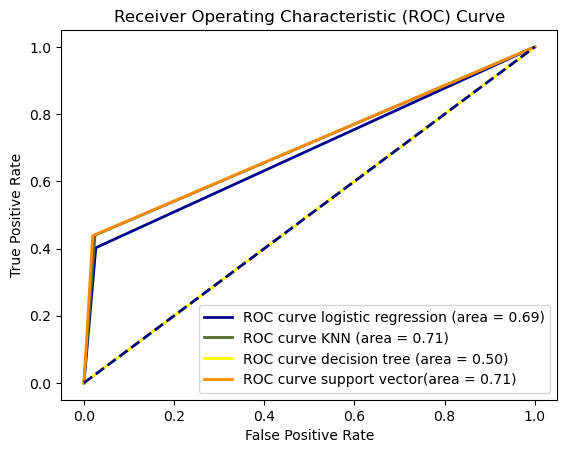

In [31]:
## Drawing the ROC curve for the models to analyse the classifier performance   

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Calculate the false positive and true positive for all the models 
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_train, pTr_lr)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_train, pTr_knn)
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_train, pTr_dtc)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_train, pTr_svc)

# Calculate the AUC (Area Under the Curve)
roc_auc_lr = roc_auc_score(y_train, pTr_lr )
roc_auc_knn = roc_auc_score(y_train, pTr_knn )
roc_auc_dtc = roc_auc_score(y_train, pTr_dtc )
roc_auc_svc = roc_auc_score(y_train, pTr_svc )

# Plot the ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='darkblue', lw=2, label='ROC curve logistic regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_knn, tpr_knn, color='darkolivegreen', lw=2, label='ROC curve KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_dtc, tpr_dtc, color='yellow', lw=2, label='ROC curve decision tree (area = %0.2f)' % roc_auc_dtc)
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label='ROC curve support vector(area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [32]:
### Conclusion ###
# After tuning the models on hyperparameters the SVC and KNN looks to perform better in terms of prediction. 
# The only drawback of SVC is time & resource consumption, rest it tops on all the scores & parameters including the ROC area. 
#   

##### Questions

In [34]:
ct_i

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Logistics Regression Tuned,0.15678,0.90923,0.91090
KNN Tuned,0.01007,0.91506,0.90831
Decision Tree Classifier Tuned,0.10011,0.88724,0.88759
SVC Tuned,34.07788,0.91946,0.91106


In [35]:
counter

,Train Time,Train Accuracy,Test Accuracy
Model,,,
Decision Tree Classifier,0.397943,1.00000,0.88792
Decision Tree Classifier Tuned,0.100110,0.88724,0.88759
KNN,0.007638,0.92765,0.90022
KNN Tuned,0.010070,0.91506,0.90831
Logistics Regression,0.390195,0.90972,0.91050
Logistics Regression Tuned,0.156780,0.90923,0.91090
SVC,28.598003,0.91821,0.90944
SVC Tuned,34.077880,0.91946,0.91106
